In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sb
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
%matplotlib inline

## Data gathering

1. locally stored twitter-archive-enhanced.csv
2. Downloading https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Get additional information using Python's Tweepy library e.g. retweet count, likes
4. Each tweet's JSON data should be written to its own line.
 Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, 
 retweet count, and favorite count.

In [51]:
#Downloading code below is commented out to avoid repeat download

#image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#r = requests.get(image_url, allow_redirects=True)
#open('image-predictions.tsv', 'wb').write(r.content)

In [52]:
# Loading the image-predictions.tsv in to a data frame
df_image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [53]:
#data frame sanity check
df_image.shape

(2075, 12)

In [54]:
#Downloading code below is commented out to avoid repeat download

#url_enhanced = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'  
#r = requests.get(url_enhanced, allow_redirects=True)
#open('twitter-archive-enhanced.csv', 'wb').write(r.content)

In [55]:
# Loading the twitter-archive-enhanced.csv in to a data frame

df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [56]:
# df_enhanced sanity check
df_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [57]:
#tweepy code commented out to avoid repeat download attempts with removed Keys 

# import tweepy
# CONSUMER_KEY = 'xxxxxxxxxxxxxxxxxxxx'
# CONSUMER_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
# ACCESS_TOKEN = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
# ACCESS_TOKEN_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [58]:
# Function to extract retweet_count, favorite_count and tweet_id from tweet json. 

import json
def extract_tweet_status_info(text_file):
    retweet_count_list=[]
    favorite_count_list=[]
    id_list=[]
    for line in text_file:
        json_content = json.loads(line)
        retweet_count_list.append(json_content['retweet_count'])
        favorite_count_list.append(json_content['favorite_count'])
        id_list.append(json_content['id'])
    d={'retweet_count': retweet_count_list, 'favorite_count':favorite_count_list, 'tweet_id': id_list}
    return pd.DataFrame(d)


In [59]:
#json downloading code using tweepy api, commented out to avoid repeat downalod 

# tweet_ids_not_found = []
# with open('tweet_json.txt', 'w', encoding="utf-8") as tweet_file:
#     for t_id in df_enhanced['tweet_id']:
#         try:
#             tweet_file.write(str(api.get_status(t_id)) + '\n')
#         except:
#             tweet_ids_not_found.append(t_id)
#             continue


In [60]:
# Loading downloaded tweet_json_copy.txt in to a data frame
with open('tweet_json_copy.txt', 'r') as tweet_file_copy:
    df_api = extract_tweet_status_info(tweet_file_copy)


In [61]:
#merging the df_api with retweet_count, favorite_count in to main data frame

df_enhanced_merge = pd.merge(df_enhanced, df_api, on='tweet_id')
df_enhanced_merge.head(2)
#checking how many unique tweet ids are there in each of the data frames
df_enhanced_merge['tweet_id'].nunique(), df_api.tweet_id.nunique(), df_image.tweet_id.nunique()

(2354, 2354, 2075)

In [62]:
# merging image data frame also in to df_enhanced_merge which already has df_enhanced and df_api contents
df_enhanced_merge_img = pd.merge(df_enhanced_merge,df_image, on='tweet_id' )

In [63]:
# checking effect on data frame dimentions after the merges
df_enhanced_merge_img.shape, df_enhanced_merge.shape, df_enhanced.shape

((2073, 30), (2354, 19), (2356, 17))

Dataset issues identification

Issue: 1, very high rating for few entries

In [64]:
#Analyzing the ratings numbers in the data set, assuming above 20 rating given is possible error
df_enhanced.groupby('rating_numerator').nunique()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
rating_numerator,,,,,,,,,,,,,,,,,
0,2,1,1,2,1,2,0,0,0,2,1,1,1,1,1,1,1
1,9,3,1,9,2,9,1,1,1,5,1,2,2,1,1,1,1
2,9,0,0,9,1,9,0,0,0,9,1,1,6,1,1,1,1
3,19,0,0,19,1,19,0,0,0,19,1,1,12,1,1,2,1
4,17,1,1,17,1,17,0,0,0,16,1,2,7,1,1,1,1
5,37,2,1,37,3,37,1,1,1,35,1,1,16,2,1,2,1
6,32,0,0,32,1,32,0,0,0,32,1,1,20,1,1,2,1
7,55,2,1,55,2,55,1,1,1,52,1,2,35,1,1,2,1
8,102,0,0,102,3,102,4,1,4,98,1,1,73,2,1,2,1


Issue2: Entry duplicate stage classification for example 14 entries below classified as doggo and one or more out of floofer, pupper, and puppo

In [65]:
df_enhanced[(df_enhanced['doggo']=='doggo') & ((df_enhanced['floofer']!='None') | (df_enhanced['pupper']!='None') | (df_enhanced['puppo']!='None'))].shape

(14, 17)

## Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook

### Quality Issues
    
**1. Missing Records**

i) Coulmns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp having large numbers of NaN <br/>
ii) 2 tweet_ids not found in data obtained through api. 2356 ids are there in twitter-archive-enhanced.csv wheras tweet_json.txt contains 2354 unique tweet ids.
iii) 281 tweet_ids are missing from image-predictions.tsv in comparison to twitter-archive-enhanced.csv
iv) None and a do not seem to be names, 576 names are "None" and 55 names are "a" 

**2. Validity issues<br/>**

i) more than 10 denominator<br/>
ii) more than 20 numerator<br/>
iii) Only 307 tweets have dog stage classified correctly
iv) rating 15 favorite_count is 0 which is perhaps indicating data quality issue

**3. Accuracy issues**

i) Source column does not contain full source content and has curtailed source data which is not useful

**4. Consistency issues**

### Tidyness issues:

i) Userids in in_reply_to_user_id, retweeted_status_user_id are being displayed in scientific notation

## Data Wrangling to address Quality and Tidyness Issues

#### 1 (i) As i am not making use of these columns in my analysis, dropping in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Resulting data frame would be clean_df_1

In [66]:
# NaN columns check
df_enhanced_merge_img.info()
df_enhanced_merge_img.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


In [88]:
clean_df_1 = df_enhanced_merge_img.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### 1(ii) and 1(iii) Merging has been done on tweet_id, unfound tweet_ids are not present in df_enhanced_merge_img 
#### 1(iv) Names are not affecting any other analysis than names popularity analysis so keeping this as is

#### 2(i) All ratings denominator should be 10, so changing all which are not equals to 10 to 10

In [90]:
#Creating a copy of data frame after first clean up step
clean_df_2 = clean_df_1.copy()
clean_df_2.loc[clean_df_2.rating_denominator !=10, 'rating_denominator'] = 10

#### 2(ii) Rating more than 20 looks invalid so assigning 20 to all such ratings

In [69]:
clean_df_2.loc[clean_df_1.rating_numerator >20, 'rating_numerator'] = 20

In [70]:
#checking if all rating denominators got changed 
clean_df_2.rating_denominator.unique().tolist()

[10]

In [71]:
#making a dataframe copy for next cleanup
clean_df_3 = clean_df_2.copy()

In [72]:
clean_df_4 = clean_df_3[['tweet_id', 'doggo','floofer', 'pupper', 'puppo']].replace('None', np.NaN)

In [73]:
#creating a new column dog_type_confirm where only one stage column has value and other 3 are NaN i.e. sum of NaN values is 3
clean_df_4['dog_type_confirm'] = np.where(clean_df_4.isnull().sum(axis=1) == 3, 'Yes', 'No')
clean_df_4['dog_type_confirm'] = clean_df_4[['dog_type_confirm']].replace('No', np.NaN)
clean_df_4['dog_type_confirm'].count()

307

#### 2(iii) Only 307 tweet ids have dog stages classified correctly so dropping dog stage columns from the main data frame and dog stages analysis on 307 tweet ids will be done seperatly on clean_df_5. 
#### 3(i) also dropping source column as the information is not used in the analysis also, the source content does not seem to be full

In [86]:
clean_df_5 = pd.merge(clean_df_3, clean_df_4.drop(['doggo','floofer', 'pupper', 'puppo'],  axis=1), on='tweet_id')

In [75]:
clean_df_6 = clean_df_3.drop(['source', 'doggo','floofer', 'pupper', 'puppo'],  axis=1)

In [76]:
clean_df_6.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8')

In [92]:
clean_df_6.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0,False,bagel,0,False,banana,0,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0,True,Pekinese,0,True,papillon,0,True


#### 4(i) : to avoid userids display in sceintific notation added pd.set_option('display.max_colwidth', -1) at the top

### 3 Insights and One Visualization

In [78]:
clean_df_6.groupby(['rating_numerator'])['favorite_count'].sum()

rating_numerator
0     27742  
1     27999  
2     20311  
3     45515  
4     45487  
5     130364 
6     86943  
7     180033 
8     232836 
9     384646 
10    1729180
11    2725682
12    5069841
13    5919975
14    1009921
15    0      
20    101602 
Name: favorite_count, dtype: int64

In [79]:
rating_fav_count_df = clean_df_6.groupby(['rating_numerator'])['favorite_count'].sum()

Text(0.5,0,'rating_numerator')

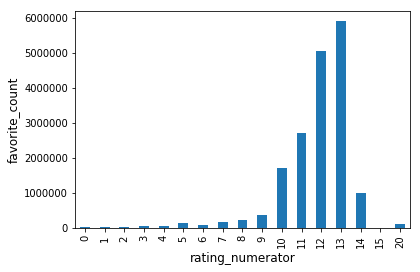

In [104]:
base_color = color=sb.color_palette()[0]
rating_fav_count_df.plot.bar(color = base_color)
plt.ylabel('favorite_count', fontsize=12)
plt.xlabel('rating_numerator', fontsize=12)

#### Insight 1: Increase in rating showing fav_count increase as well, which seems to be inline with the expectation. rating 15 favorite_count is 0 which perhaps shows a data quality issue

In [81]:
clean_df_6[clean_df_6['rating_numerator'] == 15]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
229,838916489579200512,2017-03-07 00:57:32 +0000,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,0,38,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.99,False,monitor,0.00,False,envelope,0.00,False


#### Insight 2: Close check at this entry shows that its actually a game. So removing this entry from the analsis. 

In [82]:
clean_df_7 = clean_df_6.drop([229], axis=0)

#### Insight 3: On Checking why 14 rating got drop in favorite count, it seems average favorite count is higher so this should not be taken as a drop as such

In [83]:

clean_df_7[clean_df_7['rating_numerator'] == 14]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.51,True,Cardigan,0.45,True,Chihuahua,0.03,True
21,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,46959,12082,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.13,False,tow_truck,0.03,False,shopping_cart,0.03,False
37,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,27478,5856,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,0.99,True,Cardigan,0.00,True,Chihuahua,0.00,True
50,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,50199,16570,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.28,True,Angora,0.27,False,Persian_cat,0.11,False
65,878057613040115712,2017-06-23 01:10:23 +0000,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,42876,7181,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French_bulldog,0.84,True,Boston_bull,0.08,True,toy_terrier,0.02,True
67,877611172832227328,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,0,83,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.36,True,golden_retriever,0.20,True,Irish_terrier,0.11,True
81,873697596434513921,2017-06-11 00:25:14 +0000,RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,0,12518,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.15,False,French_bulldog,0.10,True,printer,0.08,False
98,870063196459192321,2017-05-31 23:43:25 +0000,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,"https://twitter.com/dog_rates/status/870063196459192321/photo/1,https://twitter.com/dog_rates/status/870063196459192321/photo/1",14,10,Clifford,37771,8840,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.53,False,envelope,0.28,False,book_jacket,0.04,False
103,868880397819494401,2017-05-28 17:23:24 +0000,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,https://twitter.

In [84]:
clean_df_7['name'].value_counts().head(10)

None       576
a          55 
Charlie    11 
Oliver     10 
Penny      10 
Tucker     10 
Cooper     10 
Lucy       10 
Sadie      8  
Lola       8  
Name: name, dtype: int64

#### Insight 4: None and a do not seem to be names, so Charlie, Penny, Cooper, Tucker, Lucy and OLiver seems to be popular names

In [85]:
clean_df_7[clean_df_7['p1_conf'] >= 0.5].p1.value_counts().head(5)

golden_retriever      126
Pembroke              70 
Labrador_retriever    69 
Chihuahua             50 
pug                   45 
Name: p1, dtype: int64

#### Insight 5: By far golden_retriever looks to be most popular breed which has got recognized with more than 50% probablity